# College Majors data

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import linregress

In [2]:
# get datasets
all_ages = pd.read_csv('data/all-ages.csv')
grad_students = pd.read_csv('data/grad-students.csv')
majors_list = pd.read_csv('data/majors-list.csv')
recent_grads = pd.read_csv('data/recent-grads.csv')
women_stem = pd.read_csv('data/women-stem.csv')

## all ages

In [3]:
all_ages.head()

,Major_code,Major,Major_category,Total,Employed,Employed_full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th
0,1100,GENERAL AGRICULTURE,Agriculture & Natural Resources,128148,90245,74078,2423,0.026147,50000,34000,80000.0
1,1101,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,95326,76865,64240,2266,0.028636,54000,36000,80000.0
2,1102,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources,33955,26321,22810,821,0.030248,63000,40000,98000.0
3,1103,ANIMAL SCIENCES,Agriculture & Natural Resources,103549,81177,64937,3619,0.042679,46000,30000,72000.0
4,1104,FOOD SCIENCE,Agriculture & Natural Resources,24280,17281,12722,894,0.049188,62000,38500,90000.0


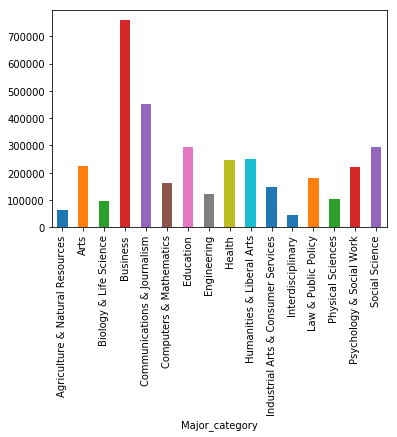

In [4]:
#total num of majors
all_ages.groupby('Major_category')['Total'].mean().plot(kind='bar')

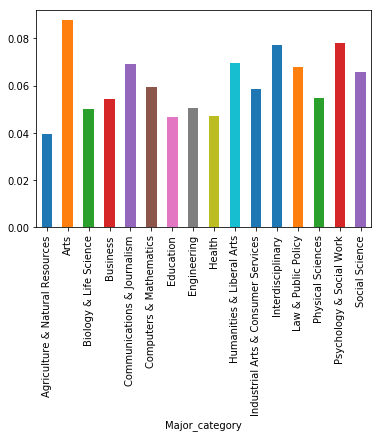

In [5]:
#unemployment rates for major categories
all_ages.groupby('Major_category')['Unemployment_rate'].mean().plot(kind='bar')

## grad students

In [6]:
print(grad_students.columns)
grad_students.head()

Index(['Major_code', 'Major', 'Major_category', 'Grad_total',
       'Grad_sample_size', 'Grad_employed', 'Grad_full_time_year_round',
       'Grad_unemployed', 'Grad_unemployment_rate', 'Grad_median', 'Grad_P25',
       'Grad_P75', 'Nongrad_total', 'Nongrad_employed',
       'Nongrad_full_time_year_round', 'Nongrad_unemployed',
       'Nongrad_unemployment_rate', 'Nongrad_median', 'Nongrad_P25',
       'Nongrad_P75', 'Grad_share', 'Grad_premium'],
      dtype='object')


,Major_code,Major,Major_category,Grad_total,Grad_sample_size,Grad_employed,Grad_full_time_year_round,Grad_unemployed,Grad_unemployment_rate,Grad_median,...,Nongrad_total,Nongrad_employed,Nongrad_full_time_year_round,Nongrad_unemployed,Nongrad_unemployment_rate,Nongrad_median,Nongrad_P25,Nongrad_P75,Grad_share,Grad_premium
0,5601,CONSTRUCTION SERVICES,Industrial Arts & Consumer Services,9173,200,7098,6511,681,0.087543,75000.0,...,86062,73607,62435,3928,0.050661,65000.0,47000,98000.0,0.096320,0.153846
1,6004,COMMERCIAL ART AND GRAPHIC DESIGN,Arts,53864,882,40492,29553,2482,0.057756,60000.0,...,461977,347166,250596,25484,0.068386,48000.0,34000,71000.0,0.104420,0.250000
2,6211,HOSPITALITY MANAGEMENT,Business,24417,437,18368,14784,1465,0.073867,65000.0,...,179335,145597,113579,7409,0.048423,50000.0,35000,75000.0,0.119837,0.300000
3,2201,COSMETOLOGY SERVICES AND CULINARY ARTS,Industrial Arts & Consumer Services,5411,72,3590,2701,316,0.080901,47000.0,...,37575,29738,23249,1661,0.052900,41600.0,29000,60000.0,0.125878,0.129808
4,2001,COMMUNICATION TECHNOLOGIES,Computers & Mathematics,9109,171,7512,5622,466,0.058411,57000.0,...,53819,43163,34231,3389,0.072800,52000.0,36000,78000.0,0.144753,0.096154


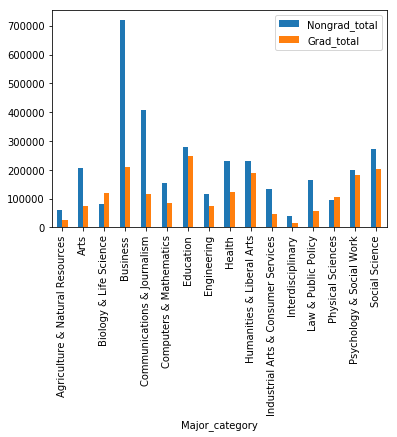

In [7]:
#total num of majors, nongrad vs grad
grad_students.groupby('Major_category')['Nongrad_total', 'Grad_total'].mean().plot(kind='bar')

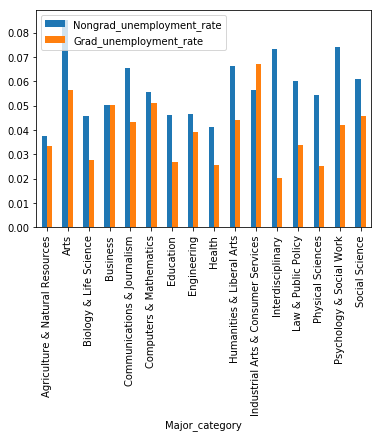

In [8]:
#total num of majors, nongrad vs grad
grad_students.groupby('Major_category')['Nongrad_unemployment_rate', 'Grad_unemployment_rate'].mean().plot(kind='bar')

## majors_list

In [9]:
majors_list.head()

,FOD1P,Major,Major_Category
0,1100,GENERAL AGRICULTURE,Agriculture & Natural Resources
1,1101,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources
2,1102,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources
3,1103,ANIMAL SCIENCES,Agriculture & Natural Resources
4,1104,FOOD SCIENCE,Agriculture & Natural Resources


In [10]:
# num of all majors
majors_list['Major_Category'].value_counts()

Engineering                            29
Education                              16
Humanities & Liberal Arts              15
Biology & Life Science                 14
Business                               13
Health                                 12
Computers & Mathematics                11
Physical Sciences                      10
Agriculture & Natural Resources        10
Psychology & Social Work                9
Social Science                          9
Arts                                    8
Industrial Arts & Consumer Services     7
Law & Public Policy                     5
Communications & Journalism             4
Interdisciplinary                       1
Name: Major_Category, dtype: int64

## recent grads

In [11]:
print(recent_grads.columns)
recent_grads.head()

Index(['Rank', 'Major_code', 'Major', 'Total', 'Men', 'Women',
       'Major_category', 'ShareWomen', 'Sample_size', 'Employed', 'Full_time',
       'Part_time', 'Full_time_year_round', 'Unemployed', 'Unemployment_rate',
       'Median', 'P25th', 'P75th', 'College_jobs', 'Non_college_jobs',
       'Low_wage_jobs'],
      dtype='object')


,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


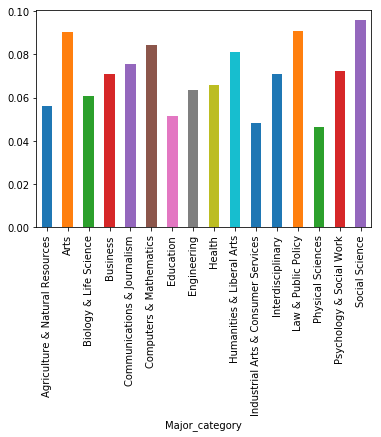

In [12]:
#unemployment rates
recent_grads.groupby('Major_category')['Unemployment_rate'].mean().plot(kind='bar')

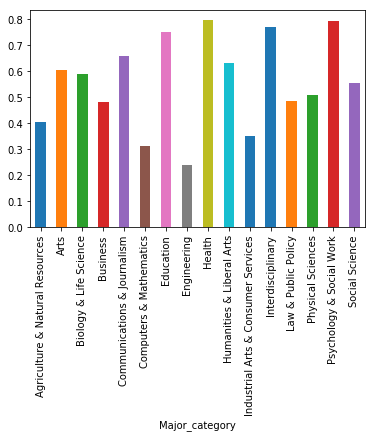

In [13]:
#proportion of women in each major
recent_grads.groupby('Major_category')['ShareWomen'].mean().plot(kind='bar')

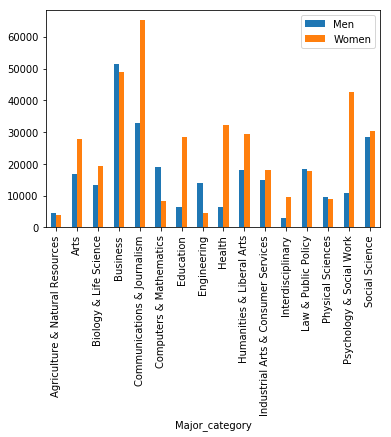

In [14]:
#men vs women in each major
recent_grads.groupby('Major_category')['Men', 'Women'].mean().plot(kind='bar')

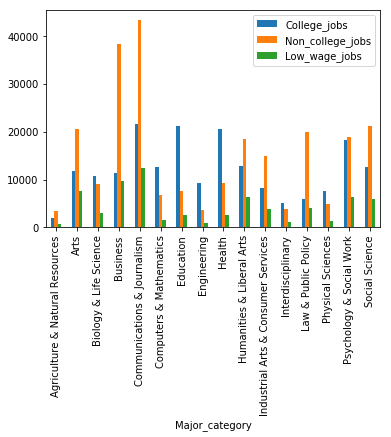

In [15]:
#'College_jobs', 'Non_college_jobs', vs 'Low_wage_jobs'
recent_grads.groupby('Major_category')['College_jobs', 'Non_college_jobs', 'Low_wage_jobs'].mean().plot(kind='bar')

## women stem

In [16]:
women_stem.head()

,Rank,Major_code,Major,Major_category,Total,Men,Women,ShareWomen,Median
0,1,2419,PETROLEUM ENGINEERING,Engineering,2339,2057,282,0.120564,110000
1,2,2416,MINING AND MINERAL ENGINEERING,Engineering,756,679,77,0.101852,75000
2,3,2415,METALLURGICAL ENGINEERING,Engineering,856,725,131,0.153037,73000
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,Engineering,1258,1123,135,0.107313,70000
4,5,2418,NUCLEAR ENGINEERING,Engineering,2573,2200,373,0.144967,65000


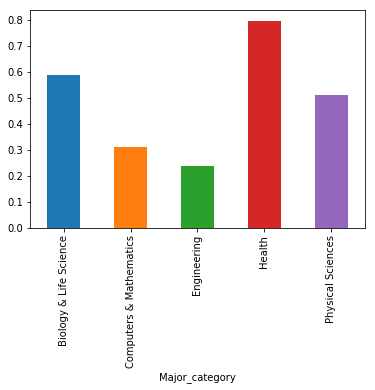

In [17]:
#proportion of women
women_stem.groupby('Major_category')['ShareWomen'].mean().plot(kind='bar')

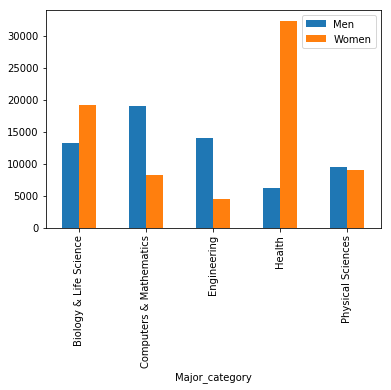

In [18]:
#total nums of men vs women
women_stem.groupby('Major_category')['Men', 'Women'].mean().plot(kind='bar')

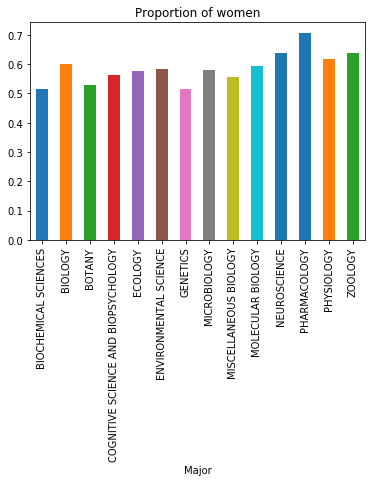

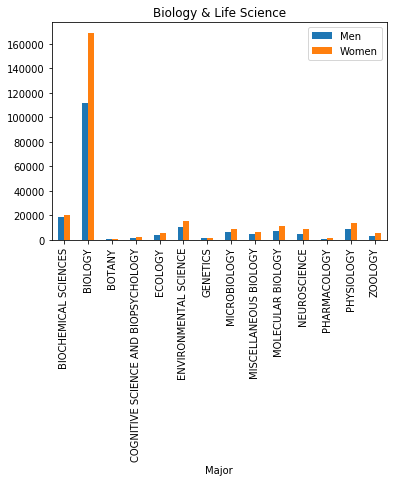

In [19]:
#bio and life sciences
biolifescience = women_stem.loc[women_stem['Major_category'] == 'Biology & Life Science']
biolifescience.groupby('Major')['ShareWomen'].mean().plot(kind='bar', title='Proportion of women')
biolifescience.groupby('Major')['Men', 'Women'].mean().plot(kind='bar', title='Biology & Life Science')

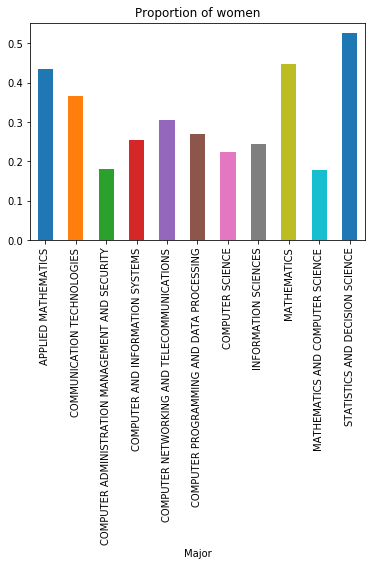

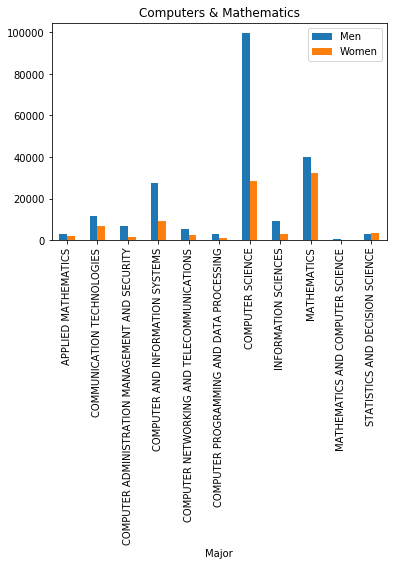

In [20]:
# computer and math
cpumath = women_stem.loc[women_stem['Major_category'] == 'Computers & Mathematics']
cpumath.groupby('Major')['ShareWomen'].mean().plot(kind='bar', title='Proportion of women')
cpumath.groupby('Major')['Men', 'Women'].mean().plot(kind='bar', title='Computers & Mathematics')

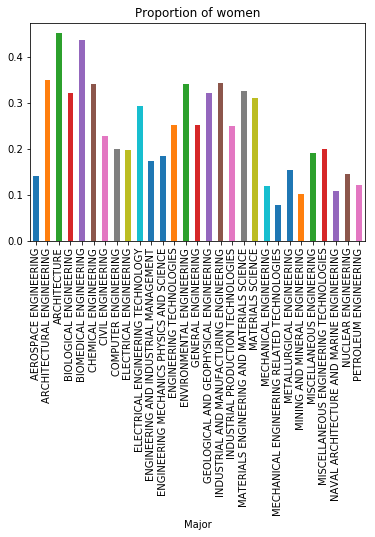

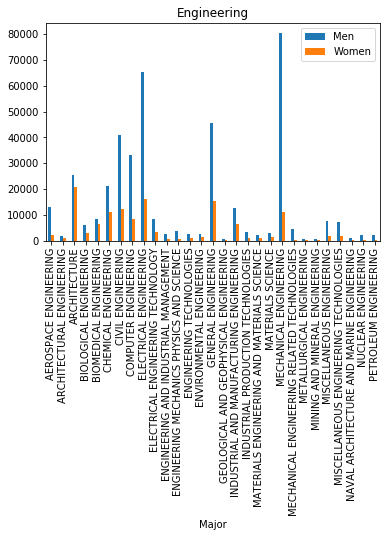

In [21]:
# engineering
eng = women_stem.loc[women_stem['Major_category'] == 'Engineering']
eng.groupby('Major')['ShareWomen'].mean().plot(kind='bar', title='Proportion of women')
eng.groupby('Major')['Men', 'Women'].mean().plot(kind='bar', title='Engineering')

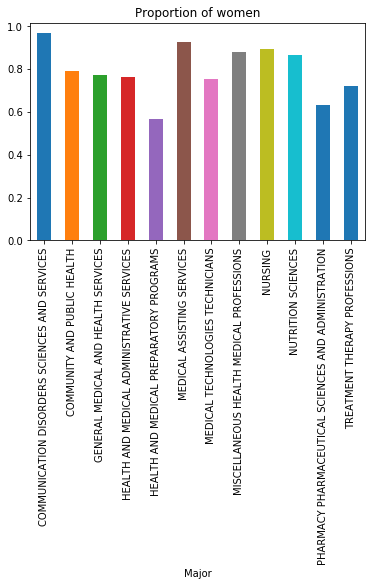

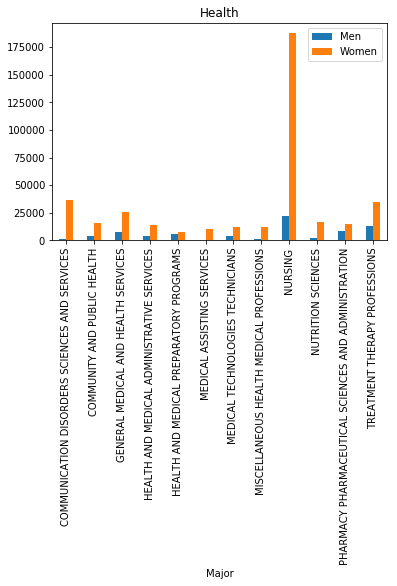

In [22]:
# health
health = women_stem.loc[women_stem['Major_category'] == 'Health']
health.groupby('Major')['ShareWomen'].mean().plot(kind='bar', title='Proportion of women')
health.groupby('Major')['Men', 'Women'].mean().plot(kind='bar', title='Health')

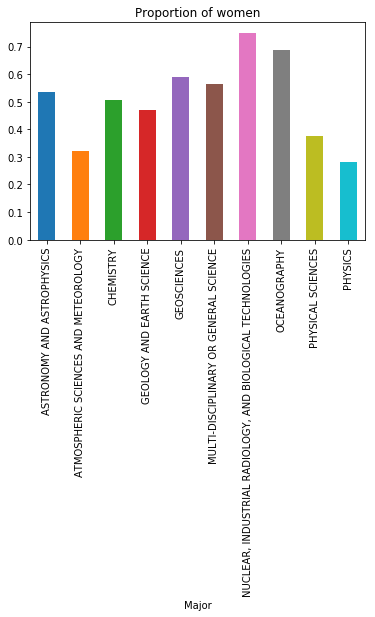

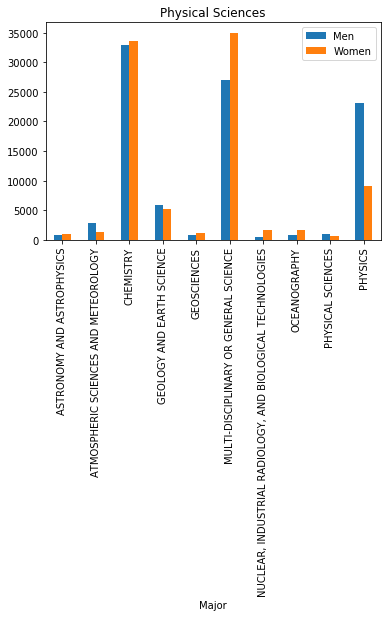

In [23]:
# physical sciences
physscience = women_stem.loc[women_stem['Major_category'] == 'Physical Sciences']
physscience.groupby('Major')['ShareWomen'].mean().plot(kind='bar', title='Proportion of women')
physscience.groupby('Major')['Men', 'Women'].mean().plot(kind='bar', title='Physical Sciences')

 can introduce another dset: major difficulty, how much is spent on education for each major<br>
 correlation between % women in field and how much it pays <br>

## Question: 
Is there a correlation between median income and % women in the field?

In [24]:
recent_grads.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [28]:
#unemployment rates
recent_grads.groupby('Major_category')['Median'].mean()

Major_category
Agriculture & Natural Resources        36900.000000
Arts                                   33062.500000
Biology & Life Science                 36421.428571
Business                               43538.461538
Communications & Journalism            34500.000000
Computers & Mathematics                42745.454545
Education                              32350.000000
Engineering                            57382.758621
Health                                 36825.000000
Humanities & Liberal Arts              31913.333333
Industrial Arts & Consumer Services    36342.857143
Interdisciplinary                      35000.000000
Law & Public Policy                    42200.000000
Physical Sciences                      41890.000000
Psychology & Social Work               30100.000000
Social Science                         37344.444444
Name: Median, dtype: float64

In [29]:
#proportion of women in each major
recent_grads.groupby('Major_category')['ShareWomen'].mean()

Major_category
Agriculture & Natural Resources        0.405267
Arts                                   0.603658
Biology & Life Science                 0.587193
Business                               0.483198
Communications & Journalism            0.658384
Computers & Mathematics                0.311772
Education                              0.748507
Engineering                            0.238889
Health                                 0.795152
Humanities & Liberal Arts              0.631790
Industrial Arts & Consumer Services    0.349523
Interdisciplinary                      0.770901
Law & Public Policy                    0.483649
Physical Sciences                      0.508683
Psychology & Social Work               0.794397
Social Science                         0.553962
Name: ShareWomen, dtype: float64

R-Value = nan


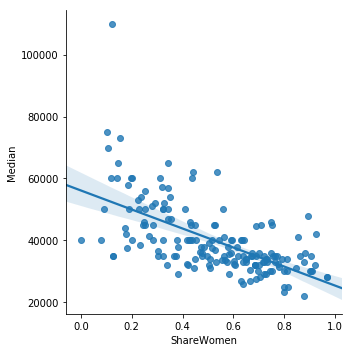

In [31]:
# linregress plot, not too indicative
sns.lmplot(data=recent_grads, x='ShareWomen', y='Median')
rval = linregress(recent_grads['ShareWomen'], recent_grads['Median']).rvalue
print('R-Value = ' + str(rval))

## Findings
negative correlation?